<a href="https://colab.research.google.com/github/schsuch/Flight_delay_causes/blob/main/flightdelays__covid__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Flight delays- Data Exploration and Analysis with Pandas

Problem: Our dataset contains data from the Bureau of the United States of transportation about the arrival, delay, and cancellation of domestic flights from July 2019 to July 2022. We will investigate and highlight which airlines and airports have the most delay and cancellation over time. We will also analyse the causes of the delays and cancellation. At last, we will see whether COVID-19 pandemic had an impact on the overwall flight cancellations.


## 1-Data Exploration
The first step of any data analysis is to explore your data with key Pandas commands:

Import the Pandas library only onced in your script:


In [ ]:
import pandas as pd

The dataset has 3 CSV files, let's import them all:

To read a csv file in Pandas and store it in a variable, use the read_csv function such as :


In [ ]:
df1=pd.read_csv("Flights_Delay_Cause_2019-2020.csv")
df2=pd.read_csv("Flights_Delay_Cause_2020-2021.csv")
df3=pd.read_csv("Flights_Delay_Cause_2021-2022.csv")

The dataset contains data from US domestic flights from July 2019 to July 2022, and consists of the following fields:

- year: the year of the flight
- month: the month of the flight
- carrier: the 2 letters abbreviation for the airline
- carrier_name: the complete name of the airline
- airport: the 3 letters Airport code
- airport_name: the airport full name
- arr_flights: number of arrived flights ontime
- arr_del15: number of delayed flights (flights are considered delayed after 15 minutes of the arrival time)
- arr_cancelled: number of cancelled flights
- arr_diverted: number of diverted flights
- arr_delay: number of delayed flights
- carrier_delay: number of flights delayed caused by the carrier
- weather_delay: number of flights delayed caused by the weather
- nas_delay: number of flighst delayed caused by the National Aviation System
- security_delay: number of flights delayed due to security issues


Let's explore the 5 first rows of the dataframe named df1:


In [ ]:
df1


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2022,7,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",131.0,26.0,6.0,0.0,2054.0,501.0,361.0,298.0,0.0,NaN
1676,2022,7,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",149.0,35.0,2.0,0.0,2198.0,679.0,139.0,425.0,0.0,NaN
1677,2022,7,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",10.0,2.0,0.0,0.0,135.0,8.0,0.0,11.0,0.0,NaN
1678,2022,7,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",98.0,13.0,1.0,0.0,950.0,162.0,0.0,291.0,0.0,NaN


In [ ]:
df1.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN


Similarly, explore the 5 last rows of df1:

In [ ]:
df1.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
1675,2022,7,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",131.0,26.0,6.0,0.0,2054.0,501.0,361.0,298.0,0.0,NaN
1676,2022,7,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",149.0,35.0,2.0,0.0,2198.0,679.0,139.0,425.0,0.0,NaN
1677,2022,7,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",10.0,2.0,0.0,0.0,135.0,8.0,0.0,11.0,0.0,NaN
1678,2022,7,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",98.0,13.0,1.0,0.0,950.0,162.0,0.0,291.0,0.0,NaN
1679,2022,7,YX,Republic Airline,XNA,"Fayetteville, AR: Northwest Arkansas Regional",56.0,13.0,3.0,0.0,1180.0,120.0,0.0,318.0,0.0,NaN


Since our dataset has 3 CSV files, for convenience let's combine all files in one document
with the .concat() method:

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
#setting the parameterignore_index=True will reasign new indexes to the whole dataset, the intial indexes of each document will be ignored

In [ ]:
df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN
5,2022,7,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",114.0,16.0,5.0,0.0,1145.0,131.0,207.0,64.0,0.0,NaN
6,2022,7,9E,NaN,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2219.0,470.0,8.0,10.0,41843.0,18321.0,1554.0,7029.0,0.0,NaN
7,2022,7,9E,NaN,ATW,"Appleton, WI: Appleton International",17.0,3.0,0.0,0.0,73.0,43.0,0.0,30.0,0.0,NaN
8,2022,7,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",37.0,4.0,3.0,0.0,301.0,279.0,22.0,0.0,0.0,NaN
9,2022,7,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",59.0,13.0,7.0,0.0,630.0,195.0,20.0,321.0,0.0,NaN


How many rows and columns the dataset has?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  int64  
 1   month           42461 non-null  int64  
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
dtypes: float64(10), int64(2), object(4)
memory usage: 5.2+ MB


The above .info() function gives us information regarding the number of rows and columns, the data types of each columns, the number of non-missing values (non-null), memory usage. Columns that contains strings datat (or mixed datatypes) will be recognised as Object in Pandas.

Make sure to check whether columns containing numerical values need to be converted as numeric for proper downsstream analyses.

Alternatively, we can use the attribute shape to have only returned the number of rows and columns:

In [ ]:
df.shape

(42461, 16)

The attribute dtypes will return only the data types of each column:

In [ ]:
df.dtypes

year                int64
month               int64
carrier            object
carrier_name       object
airport            object
airport_name       object
arr_flights       float64
arr_del15         float64
arr_cancelled     float64
arr_diverted      float64
arr_delay         float64
carrier_delay     float64
weather_delay     float64
nas_delay         float64
security_delay    float64
delays            float64
dtype: object

We can quickly run some statistics with the describe() function:

In [ ]:
df.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
count,42461.000000,42461.000000,42354.000000,42183.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,0.0
mean,2020.096324,6.529521,290.053950,41.470095,9.251641,0.624357,2757.859210,1007.217996,177.938495,587.135383,6.496647,NaN
std,0.815651,3.341909,836.485771,130.737062,70.613366,3.069780,9664.845862,3405.101443,742.131883,2784.605383,45.371314,NaN
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.000000,4.000000,33.000000,3.000000,0.000000,0.000000,158.000000,49.000000,0.000000,9.000000,0.000000,NaN
50%,2020.000000,7.000000,81.000000,10.000000,0.000000,0.000000,566.000000,211.000000,0.000000,80.000000,0.000000,NaN
75%,2021.000000,9.000000,194.000000,28.000000,3.000000,0.000000,1737.000000,705.000000,99.000000,282.000000,0.000000,NaN
max,2022.000000,12.000000,21873.000000,3506.000000,4951.000000,154.000000,305694.000000,119425.000000,26428.000000,200000.000000,3760.000000,NaN


Note: the 'year' and 'month' columns are seen as numerical values (they have the float datatype, as seen with the info() function). Hence, they will appear in the summary stats when using the describe() function. We would need to assigned to both the datetime datatype to be properly seen as dates.

## 2.Data transformation:

After exploring the dataset variables, some data transformation migh be needed.

From the previous method used .info() we could see that the year and month are both float data types. To work efficiently with dates in Pandas, they need to be converted into a date datatype. This is done by using the .todatetime() method as followed:

Before doing any modications to our dataframe, we will create a copy to not modify yet the original dataset in case we insert an error and cannot remove it. If you make an error in the original dataset without creating a copy you will need to restart the Python intrepreter to clear data in memory and re-run your script from the start.

In [ ]:
df_copy= df.copy(deep=True)

We can create a new column named "date" to store the date which will have the "month" and "year" from our dataset. We can concatenate our 2 columns month and year using the "+" sign:

In [ ]:
df_copy['date']= df_copy['month']+df_copy['year']
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2029
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2029
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2029
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2029
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2029


It looks like our new date column contain the wrong date in it, this is because the month has been added to the year since they are both integers data types!
To overcome this problem, we need to change the month and year datatypes to a string.
The .astype() method is used to cast pandas datatype to others:

In [ ]:
#First, let's convert the month and year into a string datatype so we can concatenate them afterall:
#We need to use the .astype() methodf to convert data in Pandas
df_copy=df_copy.astype({"month": str, "year":str, "date":str})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  object 
 1   month           42461 non-null  object 
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
 16  date            42461 non-null  object 
dtypes: float64(10), object(7)
memor

Now our month and year column have been well transformed to a string data type called object in Pandas

In [ ]:
#alternative method to convert datatypes in Pandas:
df_copy['month'].astype(str)
df_copy['year'].astype(str)
df_copy['date'].astype(str)

0        2029
1        2029
2        2029
3        2029
4        2029
         ... 
42456    2028
42457    2028
42458    2028
42459    2028
42460    2028
Name: date, Length: 42461, dtype: object

In [ ]:
df_copy['date']= df_copy['year']+"-"+df_copy['month']
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-7
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-7
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-7
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-7
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-7


Now our new column named date have the right format with the year followed by the month.


Using the Pandas function .to_datetime() we can transform at once the date into a datetime datatype:

In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            42461 non-null  object        
 1   month           42461 non-null  object        
 2   carrier         42461 non-null  object        
 3   carrier_name    42445 non-null  object        
 4   airport         42461 non-null  object        
 5   airport_name    42461 non-null  object        
 6   arr_flights     42354 non-null  float64       
 7   arr_del15       42183 non-null  float64       
 8   arr_cancelled   42354 non-null  float64       
 9   arr_diverted    42354 non-null  float64       
 10  arr_delay       42354 non-null  float64       
 11  carrier_delay   42354 non-null  float64       
 12  weather_delay   42354 non-null  float64       
 13  nas_delay       42354 non-null  float64       
 14  security_delay  42354 non-null  float64       
 15  de

In [ ]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07-01
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07-01
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07-01
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07-01
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07-01


We can see from the column 'data' that we could assign datatime as datatype to the 'date' column, but doing this we also introduced by default a day number, here '01'. To overcome this we would beed to use an additonal function to get only the month and the year with a correct date format.

In [ ]:
df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')

In [ ]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   year            42461 non-null  object   
 1   month           42461 non-null  object   
 2   carrier         42461 non-null  object   
 3   carrier_name    42445 non-null  object   
 4   airport         42461 non-null  object   
 5   airport_name    42461 non-null  object   
 6   arr_flights     42354 non-null  float64  
 7   arr_del15       42183 non-null  float64  
 8   arr_cancelled   42354 non-null  float64  
 9   arr_diverted    42354 non-null  float64  
 10  arr_delay       42354 non-null  float64  
 11  carrier_delay   42354 non-null  float64  
 12  weather_delay   42354 non-null  float64  
 13  nas_delay       42354 non-null  float64  
 14  security_delay  42354 non-null  float64  
 15  delays          0 non-null      float64  
 16  date            42461 non-null  period[M

The 'date' column was assigned the 'period' datatype which is another date fromat used in pandas.

Our new column "date" as been well created. Let's save it in our working folder:

In [ ]:
df_copy.to_csv('flights_dataset.csv')

Note: in the event you work with a dataset that has a column containing the full date named "date" for instance, you can set the date column to the datatype datetime directly when importing your dataset with Pandas using the argument "parse_dates" when calling the Pandas function such as: df=pd.read_csv("datafile", parse_dates=["date"])
This will give you a date format with days, months, and years by default

Let's removed unwanted columns, the month and year columns, using the medthod .drop():

In [ ]:
df_copy=df_copy.drop(['month', 'year'], axis=1)
df_copy.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07


The columns month and year has been well removed.

## 3-Data Cleaning
The next step after exploring our dataset and correct some of the datatypes we did would be to clean the dataset

Let's check how many missing values our dataset has using the isnull() function:

In [ ]:
df_copy.isnull().sum()

carrier               0
carrier_name         16
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42461
date                  0
dtype: int64

We can see see that missing values are presents in columns associated with numerical values and also in the carrier name. Missing data from the columns that contain important information on the name of the carrier or arilaine names that we are not able to identify can cause issues in our downstream analysis. We will me removed those for now since we cannot identify them.
Replacing missing values should always be case specific!

let's remove missing values from the carrier name:

In [ ]:
df_copy= df_copy.dropna(subset=['carrier_name'])

Let's verify the dataframe don't have any missing values left:

In [ ]:
df_copy.isnull().sum()

carrier               0
carrier_name          0
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42445
date                  0
dtype: int64

### Let's check the distribution of the data:

if you don't recall the name of the variables, use the following command to quicly get their names:

In [ ]:
df_copy.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

We can check the data distribution to see if we get outliers in columns with numerical values using the built-in box_plot function in Pandas:

we apply the method .box_plot to our dataframe named "df"

<Axes: >

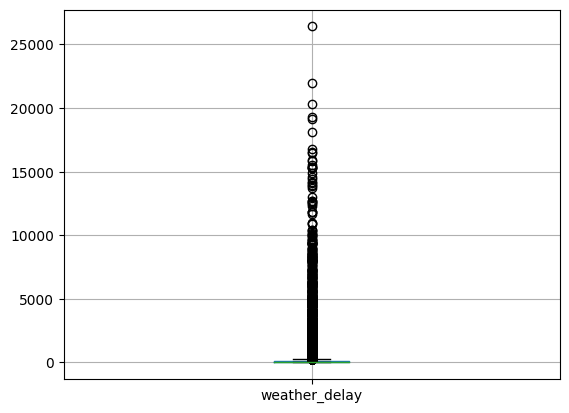

In [ ]:
df_copy.boxplot("weather_delay")

let's reuse the boxplot using a function:

In [ ]:
#We create a function that will return a box plot:
def box_plot(flights):
    return df_copy.boxplot(flights)

<Axes: >

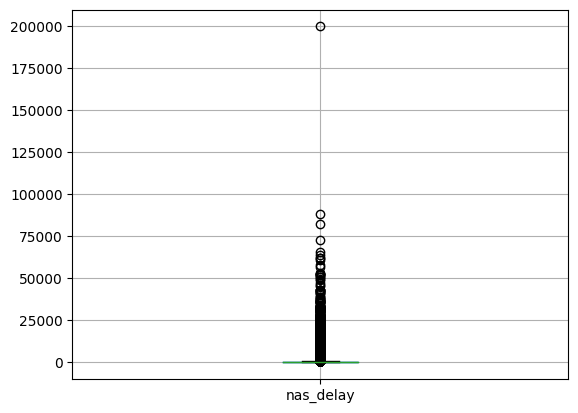

In [ ]:
#We call our function passing a data variable as argument:
box_plot('nas_delay')

Call the function again to check other variables.

In [ ]:
# Identify and remove the row with the outlier
outlier_index= df_copy[df_copy['nas_delay']>175000].index
df_cleaned= df_copy.drop(outlier_index)

In [ ]:
outlier_index # we used the .index attribute to get the row number of our outlier

Int64Index([363], dtype='int64')

<Axes: >

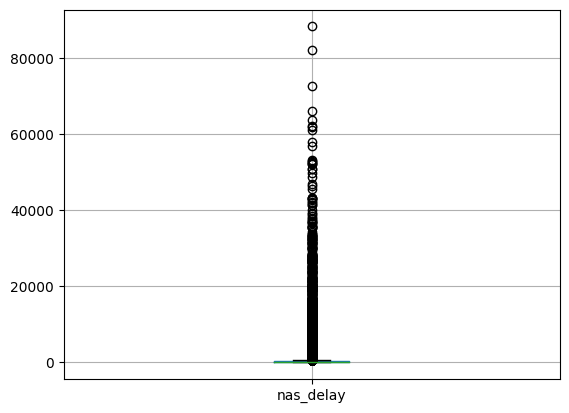

In [ ]:
df_cleaned.boxplot('nas_delay')

We can see from the above boxplot that the outliser has been well removed.

Using the Python Matplotlib visualisation library, we can plot several plots at once using the subplots() function:

Let's import the Matplotlib library to use it

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

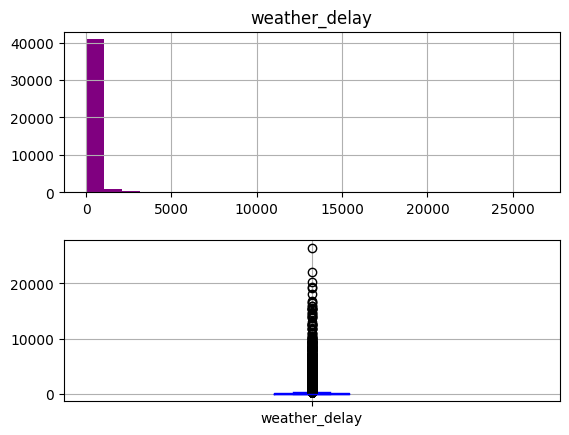

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols=1) # subplot layer has 2 rows an 1 column which means 2 figures
df_cleaned.hist('weather_delay',ax=ax[0], bins=25, color="purple")
df_cleaned.boxplot("weather_delay",ax=ax[1], color="blue")


Same as before, but saved into a function to reuse:

In [ ]:
def subplot_function(data1, data2):  # I added one parameter per plot
    figure, ax = plt.subplots(nrows=2, ncols=1)

    # Get statistics
    min_val= df_cleaned[data1].min()
    max_val= df_cleaned[data1].max()
    mean_val= df_cleaned[data1].mean()
    med_val= df_cleaned[data1].median()

    # Add lines for the min, mean and median, and max
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'blue', linestyle='dashed', linewidth = 2)

    #Change labels- 1st plot
    ax[0].set_ylabel('Frequency')

    df_cleaned.hist(data1,ax=ax[0], bins=10, color="purple")


    #Change labels- 2nd plot
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Frequency')


    df_cleaned.boxplot(data2,ax=ax[1], color="blue")

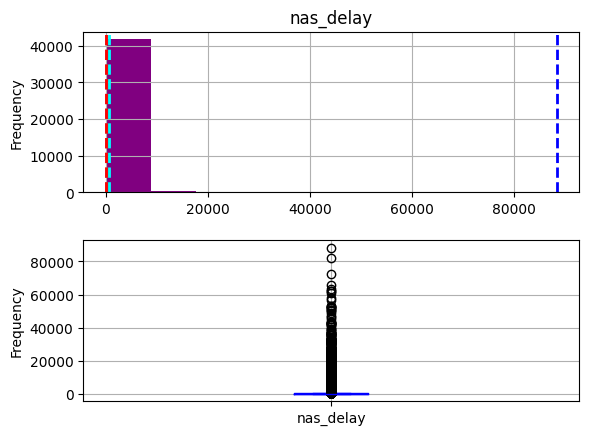

In [ ]:
subplot_function('nas_delay',"nas_delay")

## 4-Data Analysis


#### Q1-Which Airlines has the most delayed flights?

We can group the airline data and calculate the average of delayed flights per airline

In [ ]:
df_delays=df_cleaned.groupby(by="carrier_name", as_index=False)
#using the argument as_index=False in the groupby function will allow us to return a pandas dataframe, otherwise a pandas series will be returned.

we can see how many airlines has been grouped with the function .size():

In [ ]:
df_delays.size()

,carrier_name,size
0,Alaska Airlines Inc.,1851
1,Allegiant Air,3158
2,American Airlines Inc.,2574
3,Delta Air Lines Inc.,3212
4,Endeavor Air Inc.,2720
5,Envoy Air,3655
6,ExpressJet Airlines LLC,1161
7,Frontier Airlines Inc.,2499
8,Hawaiian Airlines Inc.,435
9,Horizon Air,383


next we calculate the mean of the delayed flights per airline:

In [ ]:
df_delays=df_delays["arr_del15"].mean()

In [ ]:
df_delays
 #

,carrier_name,arr_del15
0,Alaska Airlines Inc.,31.467820
1,Allegiant Air,15.350775
2,American Airlines Inc.,90.818217
3,Delta Air Lines Inc.,56.543136
4,Endeavor Air Inc.,19.188427
5,Envoy Air,23.282030
6,ExpressJet Airlines LLC,18.713537
7,Frontier Airlines Inc.,18.742065
8,Hawaiian Airlines Inc.,26.290323
9,Horizon Air,22.976501


each arilines have associated the mean of deyalyed flights.

Let's plot the data using the Matplotlib and Seaborn visualisation libraries:

Always import a library prior to use it (only once in your script!):


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

prior any plotting let's sort our data:

In [ ]:
df_delays=df_delays.sort_values(by=["arr_del15"], ascending=False)

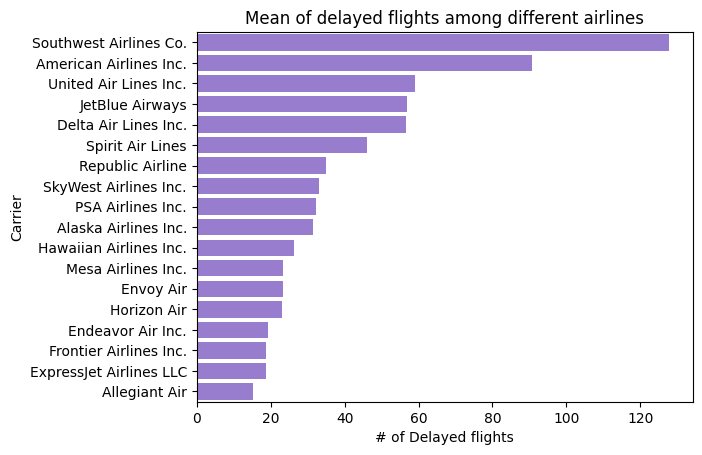

In [ ]:
sns.barplot(data=df_delays, x="arr_del15", y="carrier_name",orient="h", color="mediumpurple") # different parameters are added to the varplot function (color, graph orientation)
plt.title("Mean of delayed flights among different airlines")  # We are putting a title to the graph
plt.ylabel("Carrier") # We are changing the y axis label
plt.xlabel("# of Delayed flights") # We are changing the x axis label
plt.show() # We need to call the figure to display it with the show() function

We can see from the above plot that Southwest Airlines Co. has the most delayed flights compared to the other airlines.

#### Q2-Which Airline is the most affected by both delayed and cancelled flights?

let's use a similar approach as the previous analysis with the groupby() method:

In [ ]:
df_delays_carrier=df_cleaned.groupby(by="carrier_name", as_index=False)

In [ ]:
df_delays_carrier.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,EV,ExpressJet Airlines LLC,ABQ,"Albuquerque, NM: Albuquerque International Sun...",9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-07
2112,EV,ExpressJet Airlines LLC,AEX,"Alexandria, LA: Alexandria International",13.0,2.0,0.0,0.0,69.0,9.0,0.0,30.0,0.0,NaN,2020-07
2113,EV,ExpressJet Airlines LLC,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-07
2114,EV,ExpressJet Airlines LLC,BRO,"Brownsville, TX: Brownsville South Padre Islan...",76.0,5.0,3.0,0.0,262.0,47.0,0.0,16.0,0.0,NaN,2020-07


In [ ]:
df_delays_carrier=df_delays_carrier[["arr_del15", "arr_cancelled"]].mean()

In [ ]:
df_delays_carrier


,carrier_name,arr_del15,arr_cancelled
0,Alaska Airlines Inc.,31.467820,4.393514
1,Allegiant Air,15.350775,5.340089
2,American Airlines Inc.,90.818217,19.720171
3,Delta Air Lines Inc.,56.543136,10.099874
4,Endeavor Air Inc.,19.188427,3.935543
5,Envoy Air,23.282030,5.369732
6,ExpressJet Airlines LLC,18.713537,5.384014
7,Frontier Airlines Inc.,18.742065,2.908764
8,Hawaiian Airlines Inc.,26.290323,5.204598
9,Horizon Air,22.976501,3.775457


In [ ]:
df_delays_carrier=df_delays_carrier.set_index("carrier_name")
df_delays_carrier

,arr_del15,arr_cancelled
carrier_name,,
Alaska Airlines Inc.,31.467820,4.393514
Allegiant Air,15.350775,5.340089
American Airlines Inc.,90.818217,19.720171
Delta Air Lines Inc.,56.543136,10.099874
Endeavor Air Inc.,19.188427,3.935543
Envoy Air,23.282030,5.369732
ExpressJet Airlines LLC,18.713537,5.384014
Frontier Airlines Inc.,18.742065,2.908764
Hawaiian Airlines Inc.,26.290323,5.204598


<Axes: xlabel='carrier_name'>

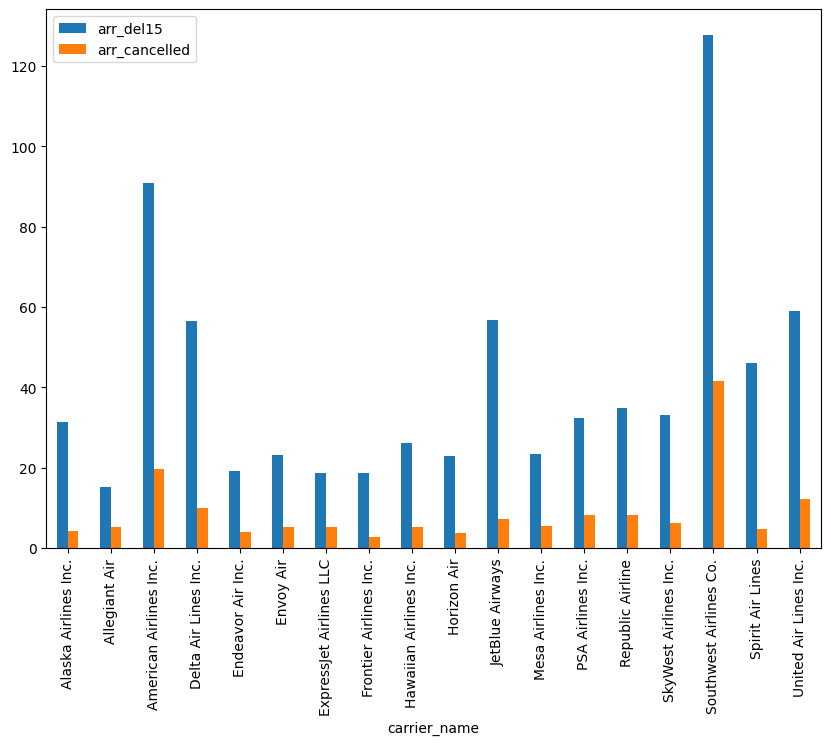

In [ ]:
df_delays_carrier.plot(kind="bar", figsize=(10,7))

<Axes: xlabel='carrier_name'>

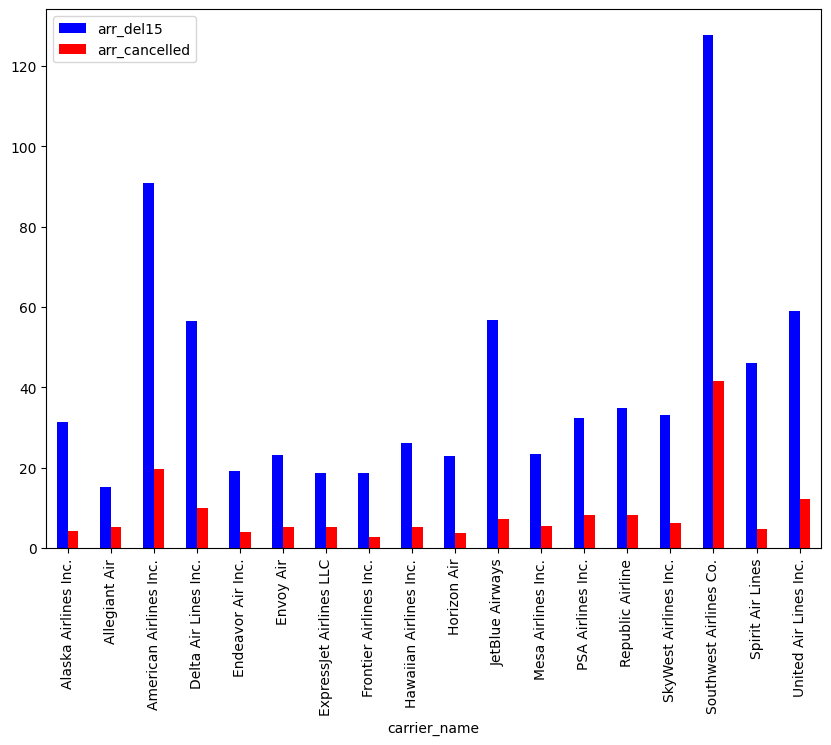

In [ ]:
# If you want to change the colour combination of the previous plot, define a color palette
colours= ['blue', 'red']
# Pass the new colours variable as parameter in the plot function
df_delays_carrier.plot(kind="bar", figsize=(10,7), color=colours)

Southwest Arilines Co. has also the most cancellation compared to the other carriers.

Let's investigate what could be the cause of the delayed of that company based on the data we have.

#### Q3-What are the main cause of flights cancellations and delays for the company Southwest Airlines Co.?

Let's isolate data from the Southwest Airlines Co. to look at the causes. To do this we need to search for the company name in carrier_name column and isolate all columns related to that carrier.

In [ ]:
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")

0        False
1        False
2        False
3        False
4        False
         ...  
42456    False
42457    False
42458    False
42459    False
42460    False
Name: carrier_name, Length: 42444, dtype: bool

In [ ]:
df_SW_airline=df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

In [ ]:
df_SW_airline.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
1409,WN,Southwest Airlines Co.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",687.0,226.0,6.0,1.0,12541.0,4255.0,66.0,720.0,60.0,NaN,2022-07
1410,WN,Southwest Airlines Co.,ALB,"Albany, NY: Albany International",293.0,80.0,6.0,0.0,5679.0,2147.0,126.0,116.0,19.0,NaN,2022-07
1411,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",200.0,48.0,4.0,0.0,2940.0,1033.0,35.0,128.0,0.0,NaN,2022-07
1412,WN,Southwest Airlines Co.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2718.0,875.0,25.0,8.0,51674.0,16615.0,1812.0,6030.0,52.0,NaN,2022-07
1413,WN,Southwest Airlines Co.,AUS,"Austin, TX: Austin - Bergstrom International",3046.0,874.0,23.0,4.0,47176.0,16714.0,1228.0,4232.0,234.0,NaN,2022-07


In [ ]:
# To confirm we have well isolated one carrier only:
count=df_SW_airline["carrier_name"].nunique()
print(count)

1


In [ ]:
# To confirm we have well isolated one carrier only- alternative method:
df_SW_airline["carrier_name"].value_counts()

Southwest Airlines Co.    2406
Name: carrier_name, dtype: int64

In [ ]:
df_SW_airline.keys() # same as the .columns attribute

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

In [ ]:
df_SW_airline.head


<bound method NDFrame.head of       carrier            carrier_name airport  \
1409       WN  Southwest Airlines Co.     ABQ   
1410       WN  Southwest Airlines Co.     ALB   
1411       WN  Southwest Airlines Co.     AMA   
1412       WN  Southwest Airlines Co.     ATL   
1413       WN  Southwest Airlines Co.     AUS   
...       ...                     ...     ...   
42369      WN  Southwest Airlines Co.     SNA   
42370      WN  Southwest Airlines Co.     STL   
42371      WN  Southwest Airlines Co.     TPA   
42372      WN  Southwest Airlines Co.     TUL   
42373      WN  Southwest Airlines Co.     TUS   

                                            airport_name  arr_flights  \
1409   Albuquerque, NM: Albuquerque International Sun...        687.0   
1410                    Albany, NY: Albany International        293.0   
1411   Amarillo, TX: Rick Husband Amarillo International        200.0   
1412   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2718.0   
1413        Aust

In [ ]:
df_SW_subset=df_SW_airline[["carrier_delay","weather_delay","nas_delay","security_delay"]] # We are selecting only the columns related to causes of delay

In [ ]:
df_SW_subset.head()

,carrier_delay,weather_delay,nas_delay,security_delay
1409,4255.0,66.0,720.0,60.0
1410,2147.0,126.0,116.0,19.0
1411,1033.0,35.0,128.0,0.0
1412,16615.0,1812.0,6030.0,52.0
1413,16714.0,1228.0,4232.0,234.0


In [ ]:
carrier_delay_tot=df_SW_subset["carrier_delay"].sum()  #we are going to create new columns to get the sum of all delay causes
print(carrier_delay_tot)

5518974.0


In [ ]:
weather_delay_tot=df_SW_subset["weather_delay"].sum()
nas_delay_tot=df_SW_subset["nas_delay"].sum()
security_delay_tot=df_SW_subset["security_delay"].sum()

In [ ]:
print(weather_delay_tot)
print(nas_delay_tot)
print(security_delay_tot)



441728.0
2542425.0
48830.0


In [ ]:
data=[carrier_delay_tot,weather_delay_tot,nas_delay_tot,security_delay_tot]

In [ ]:
data

[5518974.0, 441728.0, 2542425.0, 48830.0]

In [ ]:
df_cause=pd.DataFrame(data)

df_cause

,0
0,5518974.0
1,441728.0
2,2542425.0
3,48830.0


In [ ]:
# We are creating a new dataframe containing only the sum of each delay causes
df_cause=pd.DataFrame(data, index=["carrier", "weather", "nas", "security"], columns=["causes"])
df_cause

,causes
carrier,5518974.0
weather,441728.0
nas,2542425.0
security,48830.0


Let's use an interactive visualisation library from Python named Plotly:

import the library to use it:

In [ ]:
import plotly.express as px

In [ ]:
#sort the data before plotting
sorted_df= df_cause.sort_values(by='causes',ascending=False)
sorted_df


,causes
carrier,5518974.0
nas,2542425.0
weather,441728.0
security,48830.0


In [ ]:


figure= px.bar(sorted_df, title="Causes of flights cancellations and delays of the Southwest Airlines Co. from 2019-2022")
# Update the x-axis label
figure.update_xaxes(title='')
# Update the y-axis label
figure.update_yaxes(title='')

figure.show()

#### Q4-What are the main cause of flights cancellation and delays among the different airlines?

In [ ]:
df_cause_airlines=df_cleaned.groupby(by="carrier_name", as_index=True)[["carrier_delay","weather_delay","nas_delay", "security_delay"]].mean()
#We can set the index to carrier name directly when passing the argument as_index=True

In [ ]:
df_cause_airlines.head()

,carrier_delay,weather_delay,nas_delay,security_delay
carrier_name,,,,
Alaska Airlines Inc.,489.294595,45.616757,470.972973,12.560541
Allegiant Air,387.435719,79.325522,188.015833,4.800507
American Airlines Inc.,2414.164011,346.050525,1215.510688,17.385931
Delta Air Lines Inc.,1622.915829,207.202261,887.169598,7.716709
Endeavor Air Inc.,500.519337,112.360958,329.980479,0.893554


In [ ]:

figure2 = px.bar(df_cause_airlines, title="Causes of flights cancelation and delay")
figure2.update_layout(xaxis_title="Airlines", yaxis_title="", legend_title="")
figure2.show()

#### Q5-Does COVID-19 pandemic have an effect on flight delays and cancelations?

In [ ]:
figure2.write_html("airlines.html")


In [ ]:
df_cleaned.keys()

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

<Axes: title={'center': 'Number of canceled flights during 2019 to 2022'}, xlabel='date', ylabel='# of Cancelled flights'>

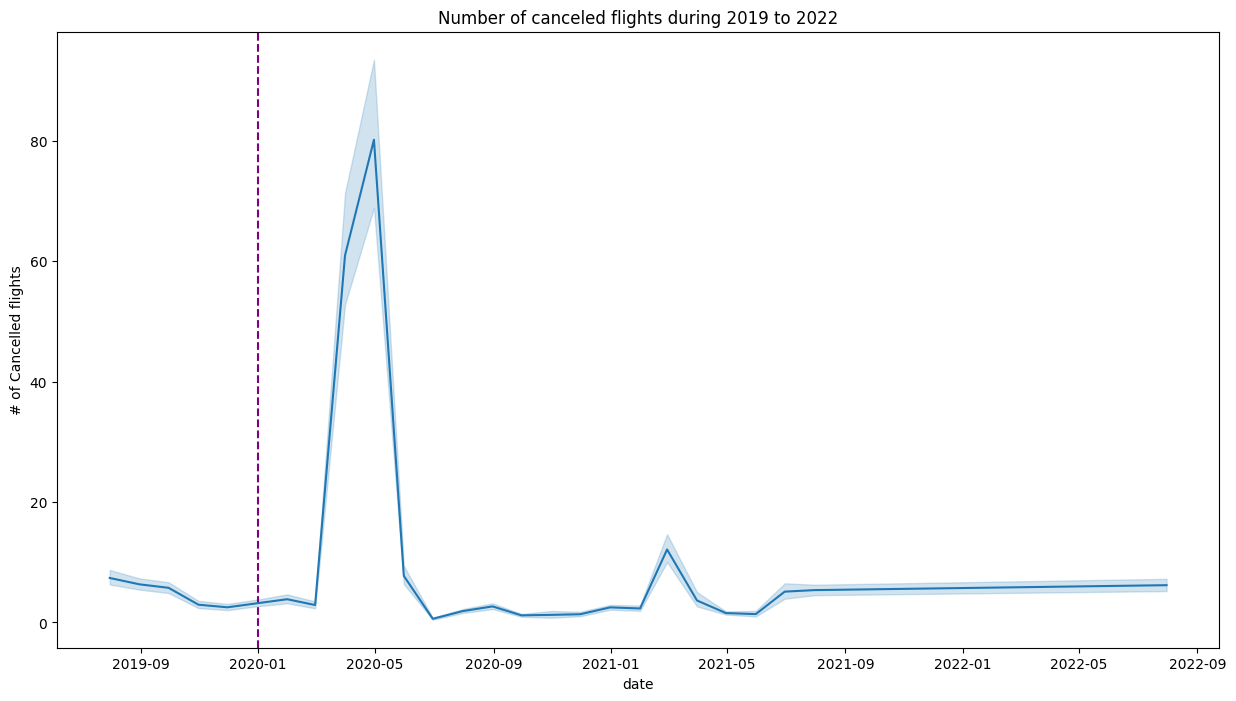

In [ ]:
plt.figure(figsize = (15,8))
plt.axvline(pd.Timestamp('2020-01-01'),color='purple',linestyle='--' ) # we need to create a specific point in time with the Timestamp() function from pandas
plt.title("Number of canceled flights during 2019 to 2022")
plt.ylabel("# of Cancelled flights")
sns.lineplot(data=df_cleaned,x = "date", y = "arr_cancelled")


We can see a sharp increase of flighs being canceled just after the appartion of the COVID-19 pandemic (purple dash line) and lockdowns that had followed and affected airline operations.